In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing data files
#registrations contains the short term rentals registration data
#neighbourhoods is a list of neighbourhoods that roughly correspond to Toronto's postal codes

registrations = pd.read_csv('C:\Python\Toronto Housing\short-term-rental-registrations-data.csv')
neighbourhoods = ['Scarborough', 'East North York', 'West North York', 'East York', 'Downtown/Midtown',
                  'Western Toronto', ' South Etobicoke', 'North Etobicoke']
postal_codes = pd.read_csv('C:\Python\Toronto Housing\postal_codes_population.csv')
print (registrations.head())

      _id operator_registration_number postal_code  ward_number
0  399682              STR-2008-FMKPBC         M4T         11.0
1  399683              STR-2009-FVRPBD         M6G         11.0
2  399684              STR-2009-GCXPBF         M1L         20.0
3  399685              STR-2009-GLDPBG         M6J          9.0
4  399686              STR-2009-GTKPBH         M6J         11.0


In [3]:
#Extracting the first 2 characters of the postal code in registrations

registrations['postal_code'] = registrations.postal_code.str.extract('(M.)')
print (registrations.head())

      _id operator_registration_number postal_code  ward_number
0  399682              STR-2008-FMKPBC          M4         11.0
1  399683              STR-2009-FVRPBD          M6         11.0
2  399684              STR-2009-GCXPBF          M1         20.0
3  399685              STR-2009-GLDPBG          M6          9.0
4  399686              STR-2009-GTKPBH          M6         11.0


In [4]:
#Counting the number of registrations in each postal code

postcode = registrations.groupby('postal_code')._id.count().reset_index()
print (postcode)

  postal_code   _id
0          M1   286
1          M2   209
2          M3   114
3          M4   594
4          M5  1058
5          M6   773
6          M8   113
7          M9   138


In [5]:
#Counting the number of registrations in each ward

wards = registrations.groupby('ward_number')._id.count()
print (wards)

ward_number
1.0      35
2.0      60
3.0     130
4.0     187
5.0      62
6.0      52
7.0      48
8.0      67
9.0     230
10.0    843
11.0    274
12.0    100
13.0    257
14.0    203
15.0     65
16.0     41
17.0     79
18.0    112
19.0    154
20.0     79
21.0     42
22.0     48
23.0     31
24.0     47
25.0     40
Name: _id, dtype: int64


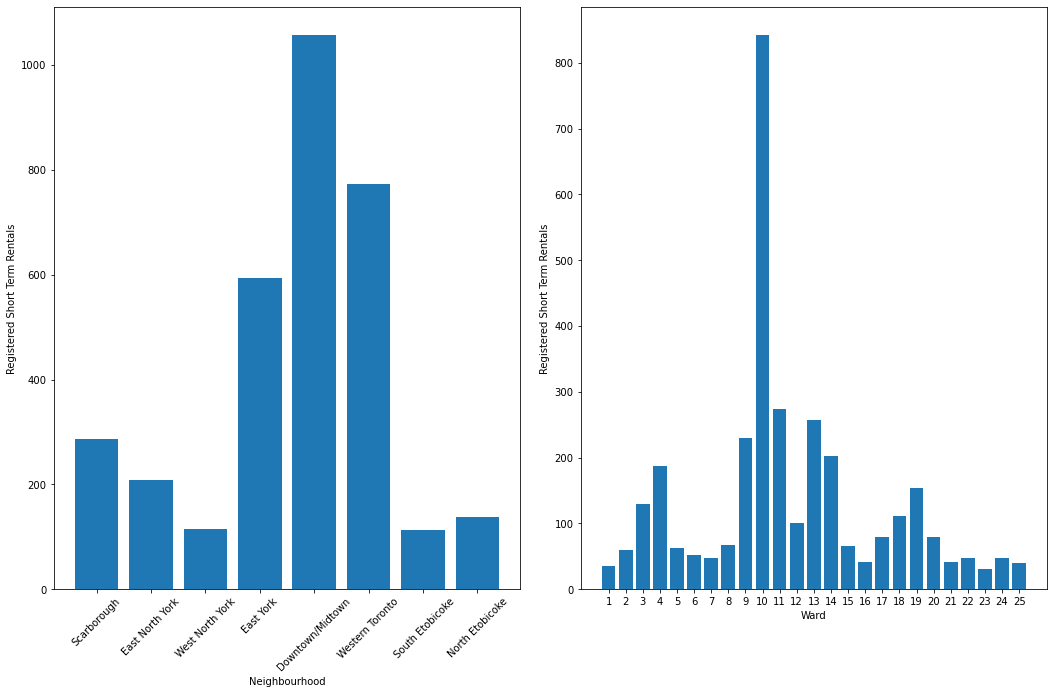

In [6]:
#Visualizing the registration counts by postal code and by ward

plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1)
plt.bar(range(len(postcode)), postcode._id)
plt.xticks(rotation=45)
ax.set_xticks(range(len(postcode)))
ax.set_xticklabels(neighbourhoods)
plt.xlabel('Neighbourhood')
plt.ylabel('Registered Short Term Rentals')

ax = plt.subplot(1,2,2)
plt.bar(range(len(wards)), wards)
ax.set_xticks(range(25))
ax.set_xticklabels(range(1,26))
plt.xlabel('Ward')
plt.ylabel('Registered Short Term Rentals')

plt.tight_layout(pad=2)
plt.savefig('C:\Python\Toronto Housing\short_term_rentals_neighbourhoods_wards.png')
plt.show()

In [7]:
#Importing a new dataframe, census_data. It contains population and dwelling count information for each postal code

census_data = pd.read_csv('C:\Python\Toronto Housing\postal_codes_population.csv')
print (census_data.head())

  Geographic_code Geographic name      Province or territory  \
0               1          Canada                        NaN   
1             A0A             A0A  Newfoundland and Labrador   
2             A0B             A0B  Newfoundland and Labrador   
3             A0C             A0C  Newfoundland and Labrador   
4             A0E             A0E  Newfoundland and Labrador   

  Incompletely enumerated Indian reserves and Indian settlements, 2016  \
0                                                  T                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   Population  Total_private_dwellings  \
0  35151728.0               15412443.0   
1     46587.0                  26155.0   
2     19792.0                  13658.0   
3 

In [8]:
#Extracting the first 2 characters of each postal code

census_data['Geographic_code'] = census_data.Geographic_code.str.extract('(M.)')

In [9]:
#Calculating the total population in each postal code

population = census_data.groupby('Geographic_code').Population.sum()
print (population)

Geographic_code
M1    634047.0
M2    275211.0
M3    238916.0
M4    436223.0
M5    261749.0
M6    461368.0
M7        20.0
M8    107773.0
M9    316832.0
MA         0.0
Name: Population, dtype: float64


In [10]:
#Calculating the total number of dwellings in each postal code

dwellings = census_data.groupby('Geographic_code').Total_private_dwellings.sum()
print (dwellings)

Geographic_code
M1    223960.0
M2    115344.0
M3     93531.0
M4    211309.0
M5    154566.0
M6    207579.0
M7        13.0
M8     53640.0
M9    119371.0
MA         0.0
Name: Total_private_dwellings, dtype: float64


In [11]:
#Merging the population and dwelling counts

population_dwellings = pd.merge(population, dwellings, left_on='Geographic_code', right_on='Geographic_code')
print (population_dwellings)

                 Population  Total_private_dwellings
Geographic_code                                     
M1                 634047.0                 223960.0
M2                 275211.0                 115344.0
M3                 238916.0                  93531.0
M4                 436223.0                 211309.0
M5                 261749.0                 154566.0
M6                 461368.0                 207579.0
M7                     20.0                     13.0
M8                 107773.0                  53640.0
M9                 316832.0                 119371.0
MA                      0.0                      0.0


In [12]:
#Merging the population and dwelling counts with the short term rental registration counts

all_data = pd.merge(postcode, population_dwellings, left_on='postal_code', right_on='Geographic_code')
all_data = all_data.rename(columns={'_id':'total_rentals', 'Total_private_dwellings':'dwellings'})
print (all_data)

  postal_code  total_rentals  Population  dwellings
0          M1            286    634047.0   223960.0
1          M2            209    275211.0   115344.0
2          M3            114    238916.0    93531.0
3          M4            594    436223.0   211309.0
4          M5           1058    261749.0   154566.0
5          M6            773    461368.0   207579.0
6          M8            113    107773.0    53640.0
7          M9            138    316832.0   119371.0


In [13]:
#Calculating rentals per capita and rentals as a percentage of the total number of dwellings

all_data['rentals_per_capita'] = all_data.total_rentals / all_data.Population
all_data['rentals_pct_of_dwellings'] = all_data.total_rentals / all_data.dwellings * 100
all_data.to_csv('C:\Python\Toronto Housing\short_term_rentals_final_data.csv')
print (all_data)

  postal_code  total_rentals  Population  dwellings  rentals_per_capita  \
0          M1            286    634047.0   223960.0            0.000451   
1          M2            209    275211.0   115344.0            0.000759   
2          M3            114    238916.0    93531.0            0.000477   
3          M4            594    436223.0   211309.0            0.001362   
4          M5           1058    261749.0   154566.0            0.004042   
5          M6            773    461368.0   207579.0            0.001675   
6          M8            113    107773.0    53640.0            0.001049   
7          M9            138    316832.0   119371.0            0.000436   

   rentals_pct_of_dwellings  
0                  0.127701  
1                  0.181197  
2                  0.121885  
3                  0.281105  
4                  0.684497  
5                  0.372388  
6                  0.210664  
7                  0.115606  


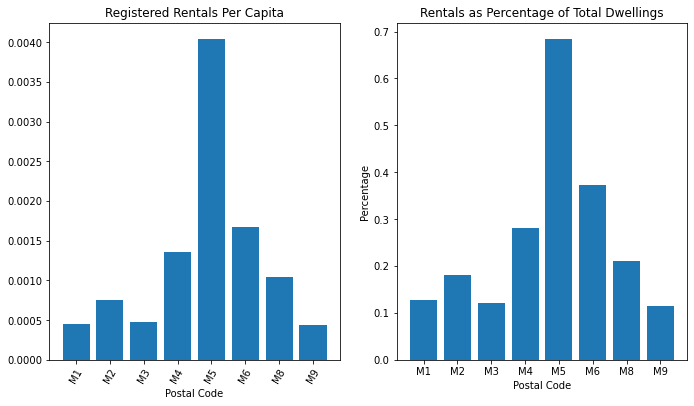

In [14]:
#Visualizing rentals per capita and rentals as a percentage of total dwellings

plt.figure(figsize=(10,6))
ax = plt.subplot(1,2,1)
plt.bar(range(len(all_data)), all_data.rentals_per_capita)
plt.xticks(rotation=60)
ax.set_xticks(range(len(all_data)))
ax.set_xticklabels(all_data.postal_code)
plt.title('Registered Rentals Per Capita')
plt.xlabel('Postal Code')

ax = plt.subplot(1,2,2)
plt.bar(range(len(all_data)), all_data.rentals_pct_of_dwellings)
ax.set_xticks(range(len(all_data)))
ax.set_xticklabels(all_data.postal_code)
plt.title('Rentals as Percentage of Total Dwellings')
plt.xlabel('Postal Code')
plt.ylabel('Percentage')

plt.tight_layout(pad=2)
plt.savefig('C:\Python\Toronto Housing\short_term_rentals_population_dwellings.png')
plt.show()